In [3]:
import numpy as np
import pandas as pd
import ccba.visualize
%matplotlib inline

In [248]:
WHITE = '#FFFFFF'
SILVER = '#C0C0C0'
GRAY = '#808080'
BLACK = '#000000'
RED = '#FF0000'
MAROON = '#800000'
YELLOW = '#FFFF00'
OLIVE = '#808000'
LIME = '#00FF00'
GREEN = '#008000'
AQUA = '#00FFFF'
TEAL = '#008080'
BLUE = '#0000FF'
NAVY = '#000080'
FUCHSIA = '#FF00FF'
PURPLE = '#800080'

CMAP = mpl.cm.ocean

In [234]:
n = 20
df = pd.DataFrame(np.random.random((n, 100)))
df.index = ['GENE {}'.format(i) for i in range(n)]
df_ann = pd.DataFrame(np.random.random((n, 3)))
df_ann.index = ['GENE {}'.format(i) for i in range(n)]

In [235]:
ref_min = df.values.min()
ref_max = df.values.max()

In [242]:
## Visualization parameters
n = n
title = 'Gene Expression'
figure_size = (30, 30)
figure_height = n + 2
figure_width = 7
heatmap_left = 0
heatmap_height = 1
heatmap_width = 6
FONT1 = {'family': 'serif',
         'color':  BLACK,
         'weight': 'bold',
         'size': 36}
FONT2 = {'family': 'serif',
         'color':  BLACK,
         'weight': 'bold',
         'size': 24}
FONT3 = {'family': 'serif',
         'color':  BLACK,
         'weight': 'normal',
         'size': 16}

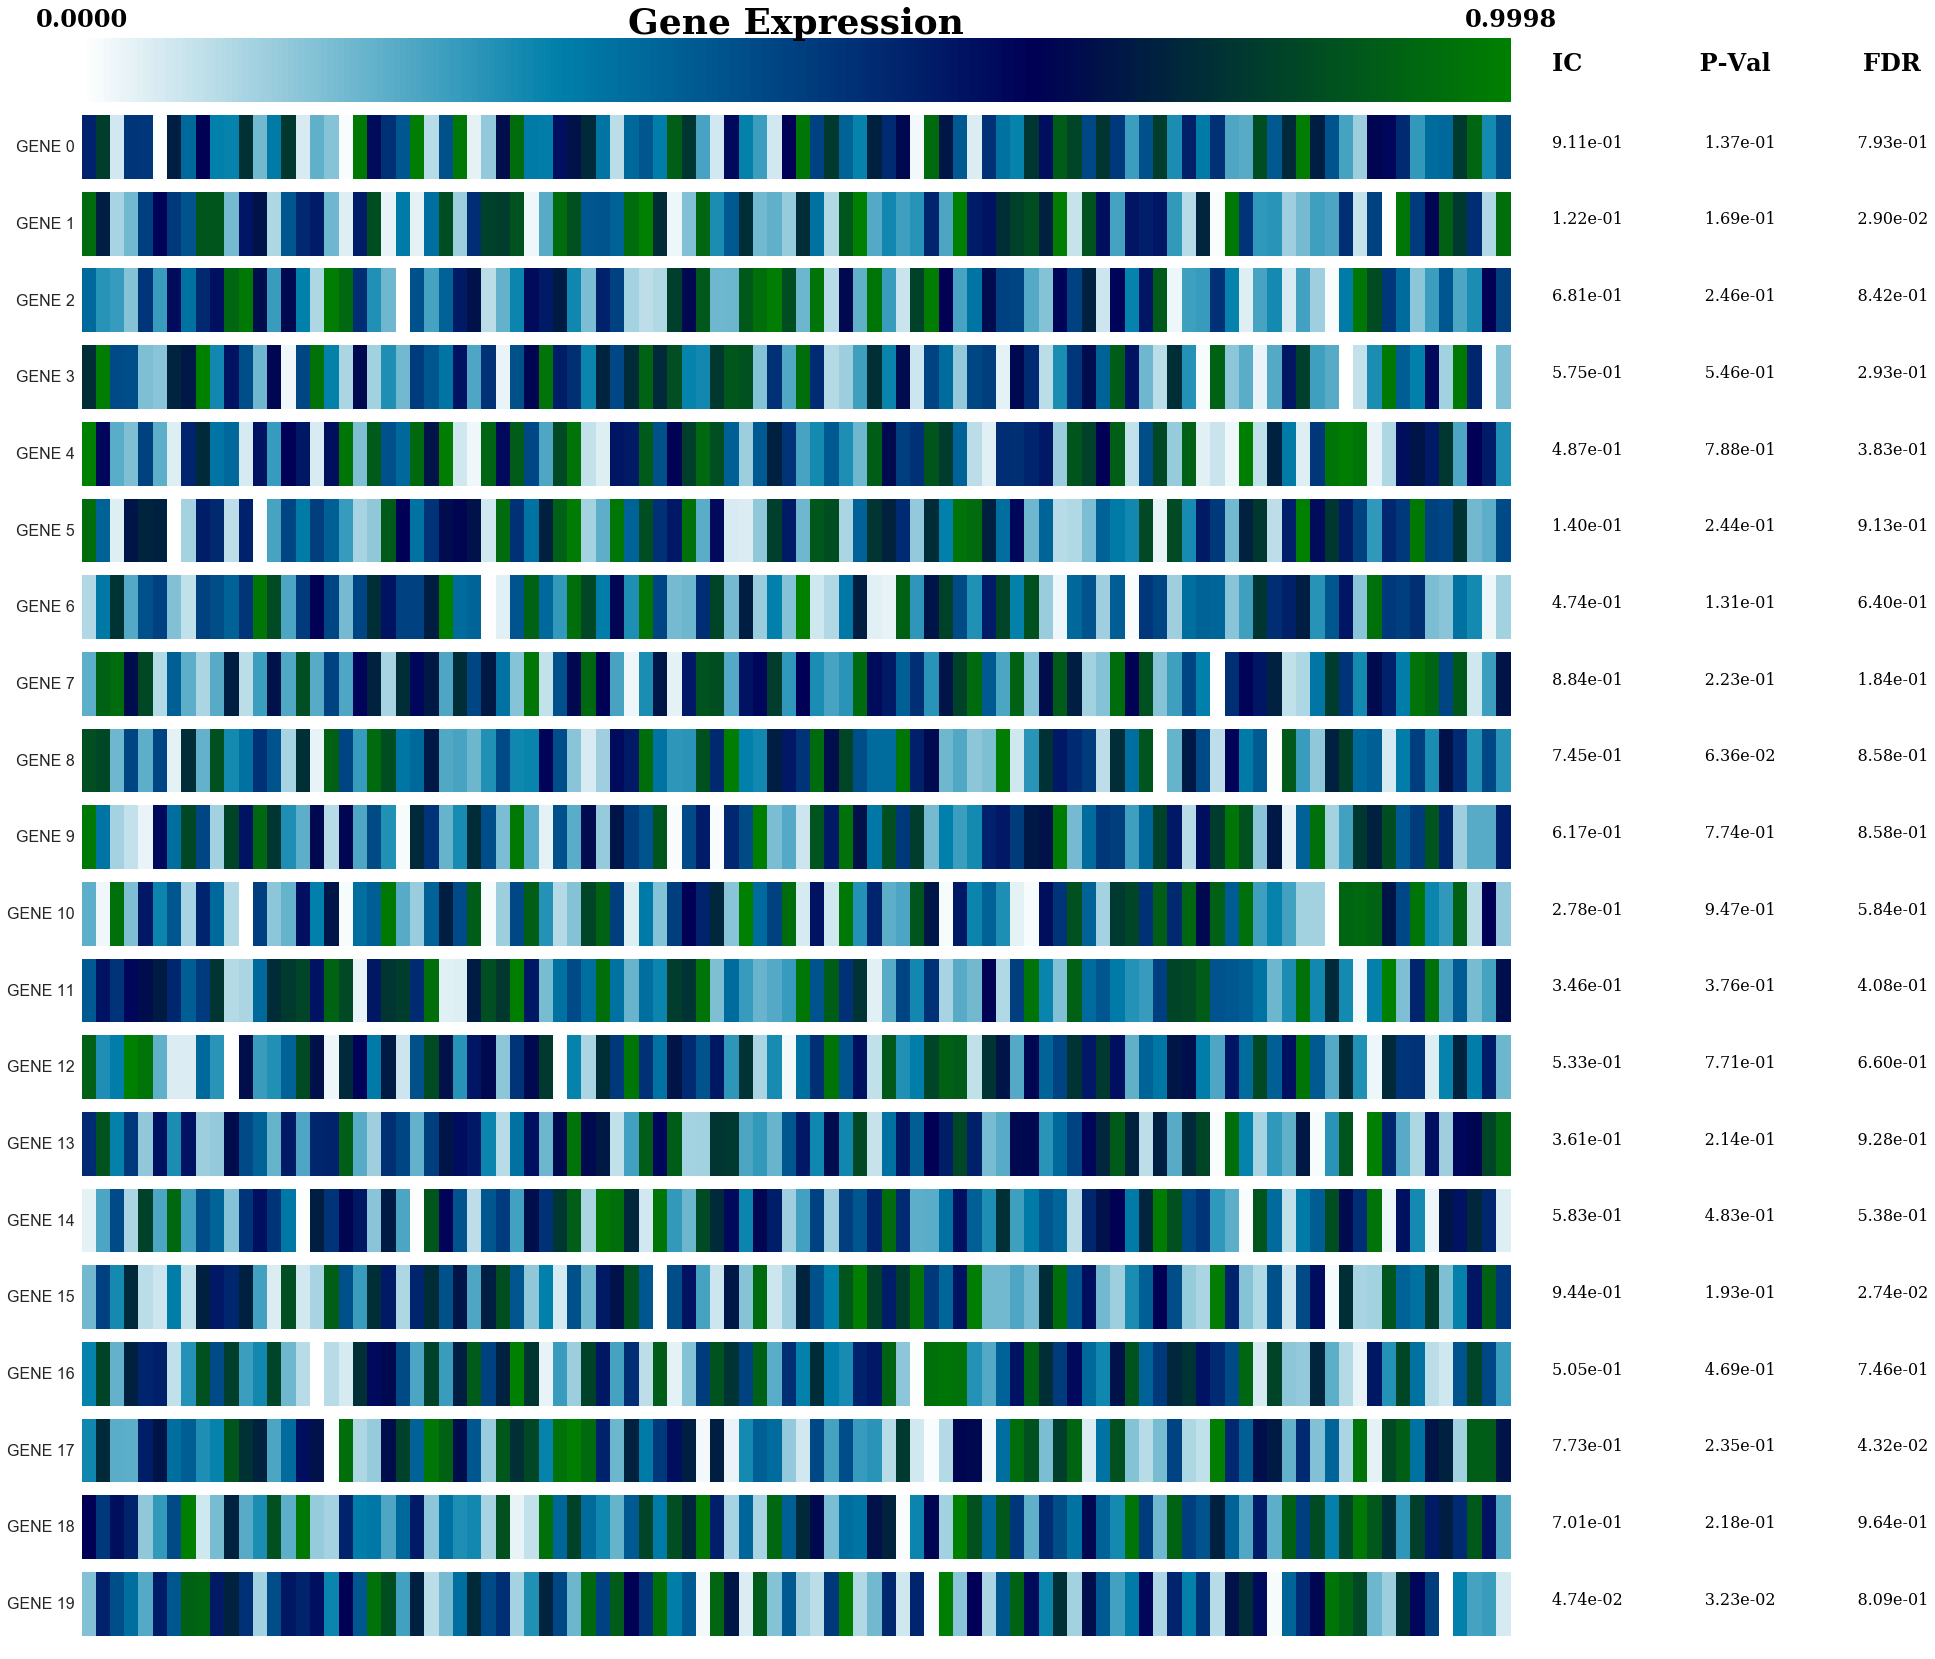

In [243]:
## Initialize figure
fig = plt.figure(figsize=figure_size)
#fig.suptitle(title, fontdict=font1)

## Initialize axes
# Reference
ax_ref = plt.subplot2grid((figure_height, figure_width), (0, heatmap_left), rowspan=heatmap_height, colspan=heatmap_width)
ax_ref.set_title(title, fontdict=font1)
norm_ref = mpl.colors.Normalize(vmin=ref_min, vmax=ref_max)
cbar_ref = mpl.colorbar.ColorbarBase(ax_ref, cmap=cmap, norm=norm_ref, orientation='horizontal', ticks=[ref_min, ref_max], ticklocation='top')
plt.setp(ax_ref.get_xticklabels(), **font2)

# Reference annotation
ax_ref_ann = plt.subplot2grid((figure_height, figure_width), (0, heatmap_left + heatmap_width), rowspan=heatmap_height, colspan=1)
ax_ref_ann.set_axis_off()
a1, a2, a3 = 'IC', 'P-Val', 'FDR'
ann = '{}\t\t{}\t\t{}'.format(a1, a2, a3).expandtabs()
ax_ref_ann.text(0, 0.5, ann, fontdict=font2)
    
# Features
for i in range(df.shape[0]):
    # Make row axes
    ax = plt.subplot2grid((figure_height, figure_width), (i + 1, heatmap_left), rowspan=heatmap_height, colspan=heatmap_width)
    sns.heatmap(df.ix[i:i + 1], ax=ax,
                vmin=ref_min, vmax=ref_max, robust=True,
                center=None, mask=None,
                square=False, cmap=cmap, linewidth=0, linecolor=WHITE,
                annot=False, fmt=None, annot_kws={},
                xticklabels=False, yticklabels=True,
                cbar=False)
    plt.setp(ax.get_xticklabels(), size=font3['size'], rotation=0)
    plt.setp(ax.get_yticklabels(), size=font3['size'], rotation=0)

# Feature annotations
for i in range(df_ann.shape[0]):
    a1, a2, a3 = df_ann.ix[i]
    ax = plt.subplot2grid((figure_height, figure_width), (i + 1, heatmap_left + heatmap_width), rowspan=heatmap_height, colspan=1)
    ax.set_axis_off()
    ann = '{:.2e}\t\t{:.2e}\t\t{:.2e}'.format(a1, a2, a3).expandtabs()
    ax.text(0, 0.5, ann, fontdict=font3)
    
# Clean up the layout
#fig.tight_layout()

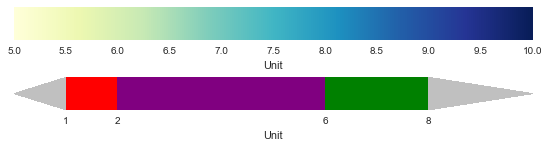

In [245]:
fig = pyplot.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax2 = fig.add_axes([0.05, 0.475, 0.9, 0.15])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.YlGnBu
norm = mpl.colors.Normalize(vmin=5, vmax=10)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb1 = mpl.colorbar.ColorbarBase(ax1,
                                cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Unit')

# The length of the bounds array must be one greater than the length of the color list.
cmap = mpl.colors.ListedColormap([RED, PURPLE, GREEN])
# The bounds must be monotonically increasing.
bounds = [1, 2, 6, 8]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Eextended ends to show the 'over' and 'under' value colors.
cmap.set_over(SILVER)
cmap.set_under(SILVER)
cb2 = mpl.colorbar.ColorbarBase(ax2,
                                cmap=cmap,
                                norm=norm,
                                boundaries=[bounds[0] - 3] + bounds + [bounds[-1] + 3],
                                extend='both',
                                extendfrac='auto',
                                ticks=bounds,
                                spacing='proportional',
                                orientation='horizontal')
cb2.set_label('Unit')